**Load Packages**


In [213]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

Diabeties Data Example
--
Load data using from sklearn


In [214]:
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
x = diabetes.data
y = diabetes.target

print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

Manipulating data

In [215]:
nsamp, natt = x.shape
print("Num samples = {0:d}, Num attributes = {1:d}".format(nsamp, natt))

Num samples = 442, Num attributes = 10


Print ages of the first 5 subjects

In [216]:
df = pd.DataFrame(x, columns=diabetes.feature_names) #Load the data to a dataframe to visualize using pandas.
df.head(6)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041180,-0.096346


Print the attributes S1-S3 fr subjects 10-15

In [217]:
z = df[['s1', 's2', 's3']]
print(z[10:16])

          s1        s2        s3
10 -0.103389 -0.090561 -0.013948
11 -0.007073  0.045972 -0.065491
12 -0.004321 -0.009769  0.044958
13 -0.004321 -0.015719 -0.002903
14  0.017694 -0.000061  0.081775
15  0.089244  0.107662 -0.039719


Create a scatter plot -> y vs BMI

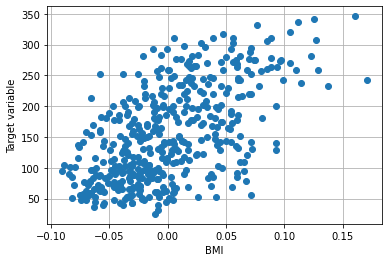

In [218]:
xp = np.array(df['bmi'])
yp = np.array(y)

plt.plot(xp, yp, 'o')
plt.xlabel('BMI')
plt.ylabel('Target variable')
plt.grid(True)

**Using Simple Linear Regression for Each Feature Individually **

---



In [219]:
ym = np.mean(y)
syy = np.mean((y-ym)**2)
Rsq = np.zeros(natt)
beta0 = np.zeros(natt)
beta1 = np.zeros(natt)
for k in range(natt):
    xm = np.mean(x[:,k])
    sxy = np.mean((x[:,k]-xm)*(y-ym))
    sxx = np.mean((x[:,k]-xm)**2)
    beta1[k] = sxy/sxx
    beta0[k] = ym - beta1[k]*xm
    Rsq[k] = (sxy)**2/sxx/syy
    
    print("{0:2d} Rsq={1:f} beta0={2:f} beta1={3:f}".format(k,Rsq[k],beta0[k],beta1[k]))

 0 Rsq=0.035302 beta0=152.133484 beta1=304.183075
 1 Rsq=0.001854 beta0=152.133484 beta1=69.715356
 2 Rsq=0.343924 beta0=152.133484 beta1=949.435260
 3 Rsq=0.194908 beta0=152.133484 beta1=714.741644
 4 Rsq=0.044954 beta0=152.133484 beta1=343.254452
 5 Rsq=0.030295 beta0=152.133484 beta1=281.784593
 6 Rsq=0.155859 beta0=152.133484 beta1=-639.145279
 7 Rsq=0.185290 beta0=152.133484 beta1=696.883030
 8 Rsq=0.320224 beta0=152.133484 beta1=916.138723
 9 Rsq=0.146294 beta0=152.133484 beta1=619.222821


Plot for the maximum Rsq

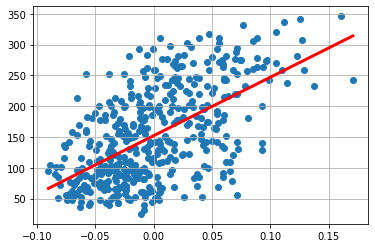

In [220]:
# Find the index of the single variable with the best R^2
imax = np.argmax(Rsq)

# Regression line over the range of x values
xmin = np.min(x[:,imax])
xmax = np.max(x[:,imax])
ymin = beta0[imax] + beta1[imax]*xmin
ymax = beta0[imax] + beta1[imax]*xmax
plt.plot([xmin,xmax], [ymin,ymax], 'r-', linewidth=3)

# Scatter plot of points
plt.scatter(x[:,imax],y)
plt.grid()

**PYTHON BRODCASTING**

**Improvements with multiple linear models**
---
We can fit multiple linear model using sklearn package
Split the data into 2 parts: ns_train = 300 samples for training & ns_test = 441-300 = 142 samples for testing.

In [221]:
ns_train = 300
ns_test = nsamp - ns_train
x_tr = x[:ns_train,:]     # Gets the first ns_train rows of X
y_tr = y[:ns_train]       # Gets the correspoinding rows of y

**Fit in a linear model **


In [222]:
regr = linear_model.LinearRegression()
regr.fit(x_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Check values of intercept and coefficients 

In [223]:
regr.intercept_

152.34786451820108

In [224]:
regr.coef_

array([ -16.57607993, -254.66532396,  560.98630022,  278.91811152,
       -393.41357305,   97.05460405,  -19.0023093 ,  169.46450327,
        632.95050374,  114.21638941])

Calculate Rss (Per sample) and Rsq on **traininig** **data**  -- **Train the model**


In [197]:
y_tr_pred = regr.predict(x_tr)
RSS_tr = np.mean((y_tr_pred-y_tr)**2)/(np.std(y_tr)**2) #std ->std deviation.
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.485281
R^2 =            0.514719


Scatter plot for actual vs predicted. 

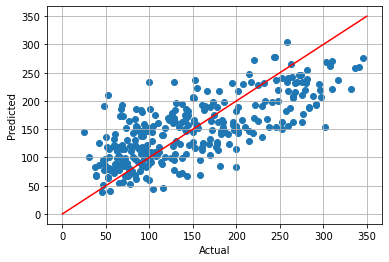

In [198]:
plt.scatter(y_tr,y_tr_pred)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

**Validate on Test Data**
---
Evalthe model on the test sample

In [225]:
x_test = x[ns_train:,:]
y_test = y[ns_train:]
y_test_pred = regr.predict(x_test) #Get the predicted value using test sample and previously trained model.
RSS_test = np.mean((y_test_pred-y_test)**2)/(np.std(y_test)**2)
Rsq_test = 1-RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 =            {0:f}".format(Rsq_test))

RSS per sample = 0.492801
R^2 =            0.507199


Scatter plot

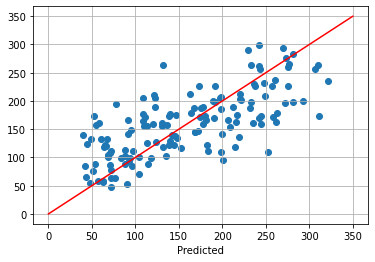

In [226]:
plt.scatter(y_test,y_test_pred)
plt.plot([0,350],[0,350],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()